
##### Project 1: To Plot Execution time of various sorting algorithms for various size of random input list of integers.  
##### By Mayur Selukar BT16CSE003
1. Selection Sort
2. Bubble Sort
3. Modified Bubble Sort
4. Insertion Sort
5. Merge Sort 
6. Quick Sort

In [1]:
import timeit 
import random
import pprint
import time
import copy
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk') # for Coloring of the graphs
import sys
sys.setrecursionlimit(10000)
# in already sorted inputs the depth of recursion in quick sort goes to the length of list

In [2]:
min = int(-100000)
max = int(100000)
no_of_x_points = 20
min_x_point = 1000
x_step = 250
data_types = ['random','accending','decending']
algo_names = ["selection_sort","bubble_sort","mod_bubble_sort","insertion_sort","merge_sort","quick_sort"]
times = {}
x_data = [] #the length of the input list
"""
times is the dictonary which stores all the y_data
times[#data_length#][#data_type#][#algorithm#] holdes the time of execution for the given parameters
the loop below initializes the times dictonary to two levels of the three
it also gets the length of the input data lists 
"""
for i in range(no_of_x_points):
    length_list = min_x_point+(x_step*i)
    x_data.append(length_list)
    times[length_list] = {}
    for data_type in data_types:
        times[length_list][data_type] = {}

In [3]:
data = {}
"""
This cell generates the data and stores them the apporate data_type 
in the data dictonary
"""
for length_list in x_data:
    data_random = []
    data_accending = []
    data_decending = []
    #generating random data and storing in the data_random list
    for x in range(length_list): 
        data_random.append(int(random.randint(min,max)))
    data_accending = sorted(data_random)
    data_decending = sorted(data_random,reverse = True)
    #data[length_of_data] is a dictonary which stores the data lists in
    #as follows data["LENGTH"]["TYPE"] = list of data
    data[length_list] = {}
    data[length_list]["random"] = data_random
    data[length_list]["accending"] = data_accending
    data[length_list]["decending"] = data_decending

In [4]:
def selection_sort(data):
    length = len(data)
    for i in range (0,len(data)):
        max_index = 0
        for j in range(i,(length - i - 1)):
            if data[j] > data[max_index]:
                max_index = j
                
        data[-i-1],data[max_index] = data[max_index],data[-i-1]
    return data

In [5]:
#print (selection_sort(data_random))

In [6]:
def bubble_sort(data):
    length = len(data)
    for i in range (0,length):
        for j in range(0,(length - i - 1)):
            if data[j] > data[j+1]:
                data[j],data[j+1] = data[j+1],data[j]
    return (data)

In [7]:
#print(bubble_sort(data_random))

In [8]:
def mod_bubble_sort(data):
    length = len(data)
    is_sorted = False
    for i in range (0,length):
        if is_sorted:
            break
        is_sorted = True
        for j in range(0,(length - i - 1)):
            if data[j] > data[j+1]:
                is_sorted = False
                data[j],data[j+1] = data[j+1],data[j]
    return (data)

In [9]:
#print(mod_bubble_sort(data_random))

In [10]:
def insertion_sort(data):
    length = len(data)
    for i in range (1,length):
        key = data[i]
        j = i-1
        while j >= 0 and data[j] > key:
            data[j+1] = data[j]
            j -= 1
        data[j+1] = key
    return (data)

In [11]:
def merge(arr,left,mid,right):
    
    size1 = ( mid -left + 1)
    size2 = (right - mid)
 
    arr1 = [0] * (size1)
    arr2 = [0] * (size2)
    
    #copy data into arr1 and arr2
    for i in range(0,size1):
        arr1[i] = arr[left + i]
        
    for i in range(0,size2):
        arr2[i] = arr[mid + 1 + i]
     
    #print(arr1)
    #print(arr2)
    i = 0 # index of arr1
    j = 0 # index of arr2
    k = left # index of arr
    
    while i < size1 and j < size2 :
        if (arr1[i] < arr2[j]):
            arr[k] = arr1[i]
            k += 1
            i += 1
        else:
            arr[k] = arr2[j]
            k += 1
            j += 1
            
    while i < size1:
        arr[k] = arr1[i]
        i += 1
        k += 1
        
    while j < size2:
        arr[k] = arr2[j]
        j += 1 
        k += 1

In [12]:
def merge_sort(data,left,right):
    if left < right:
        mid = (left + right ) // 2 # integer result
        merge_sort(data,left,mid)
        merge_sort(data,mid+1,right)
        merge(data,left,mid,right)
       

In [13]:
def partition(arr,left,right):
    pivot = arr[right]
    i = left
    j = right-1
    while(i < j and arr[i] <= pivot):
        i += 1
    while (i < j and arr[j] > pivot):
        j -= 1
    if(arr[j] > pivot):
        j -= 1 
        # at this point i = j = 0
    while(i < j):
        #swap ith and jth
        #print(arr)
        #print("swapping {} and {}".format(i,j))       
        arr[i],arr[j] = arr[j],arr[i]
        #print(arr)
        #print("\n")
        i += 1
        j -= 1
        while(arr[i] <= pivot):
            i += 1
        while (arr[j] > pivot):
            j -= 1
    #print("\n Out OF Loop with i = {} j = {}".format(i,j))
    #print(arr)
    #print("swapping {} and {}".format(right,j))
    arr[right],arr[i] = arr[i],arr[right]
    #print("Returning")
    #print(arr)
    #print("========================\n")
    return (i)

In [14]:
def quick_sort(arr,left,right):
    if left < right:
        mid = partition(arr,left,right)
        quick_sort(arr,left,mid-1)
        quick_sort(arr,mid+1,right)

In [15]:
def measure_times(data,x_data,times):
    """
        This functions measures the runtimes of various sorting algorithms
        here the type of data for all the algorithms is same and fixed, it 
        uses the time.time() function and returns them in a dictionary
        The algorithms under consideration are mentioned above 
    """
    for list_length in times:
        for data_type in times[list_length]: 
            #------------------------------------------------------------------
            name = "selection_sort"
            temp = copy.deepcopy(data[list_length][data_type])
            
            start = time.time()
            selection_sort(temp)
            stop = time.time()            
            
            times[list_length][data_type][name] = stop-start
            #------------------------------------------------------------------
            name = "bubble_sort"
            temp = copy.deepcopy(data[list_length][data_type])
            
            start = time.time()
            bubble_sort(temp)
            stop = time.time()
            
            times[list_length][data_type][name] = stop-start
            #------------------------------------------------------------------
            name = "mod_bubble_sort"
            temp = copy.deepcopy(data[list_length][data_type])
            
            start = time.time()
            mod_bubble_sort(temp)
            stop = time.time()
            
            times[list_length][data_type][name] = stop-start
            #------------------------------------------------------------------
            name = "insertion_sort"
            temp = copy.deepcopy(data[list_length][data_type])
            
            start = time.time()
            insertion_sort(temp)
            
            stop = time.time()
            
            times[list_length][data_type][name] = stop-start
            #------------------------------------------------------------------
            name = "merge_sort"
            temp = copy.deepcopy(data[list_length][data_type])
            max_i = len(temp) - 1
            
            start = time.time()
            merge_sort(temp,0,max_i)
            
            stop = time.time()
            
            times[list_length][data_type][name] = stop-start
            #------------------------------------------------------------------
            name = "quick_sort"
            temp = copy.deepcopy(data[list_length][data_type])
            max_i = len(temp) - 1
            
            start = time.time()
            quick_sort(temp,0,max_i)
            
            stop = time.time()
            
            times[list_length][data_type][name] = stop-start
    return times

In [16]:
times = measure_times(data,x_data,times)

In [17]:
pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(times)
"""
Uncomment the above line to see the data being plotted
"""

'\nUncomment the above line to see the data being plotted\n'

In [18]:
def plot_by_data_types(times,x_data,data_type):
    y_data = {}
    for algorithm in algo_names:
        y_data[algorithm] = []
    for data_length in times:
        for algorithm in times[data_length][data_type]:
            y_data[algorithm].append(times[data_length][data_type][algorithm])
    for algorithm in algo_names:
        plt.plot(x_data,y_data[algorithm],c=next(cycol),label = algorithm)
        plt.xlabel("Length of list")
        plt.ylabel("Execution Time")
        plt.title("Execution time for "+ data_type +" list of integers")
        plt.legend()
        
    title = "Execution time for "+ data_type +" list of integers"
    plt.savefig( title+'.png', format='png', dpi=600, orientation='portrait')    
    plt.show()


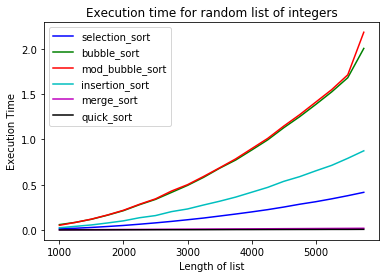

In [19]:
plot_by_data_types(times,x_data,"random")

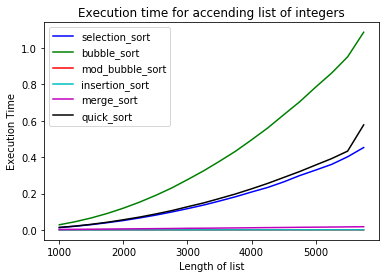

In [20]:
plot_by_data_types(times,x_data,"accending")

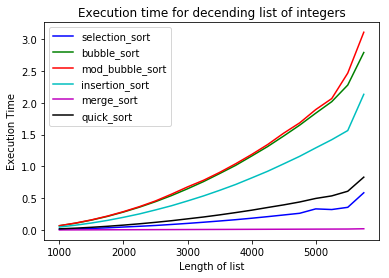

In [21]:
plot_by_data_types(times,x_data,"decending")

All the graphs are stored in the current working directory in high resolution

#### Conclusion / Findings 
1. ##### Selection Sort  
    Selection Sort provides a good median algorithm with the complexity of $n^2$.  
    It has less overhead as compared to all other algorithms of order $n^2$ tested as seen by the graphs of random data.  
2. ##### Bubble Sort  
    Bubble Sort consistntly peformed worst in all data sets its complexity of $n^2$ was visualised by the graph and the poor peformance can be attributed to the overhead of swapping.  
3. ##### Modified Bubble Sort
    Modified Bubble sort peformed almost similarly as compared to bubble sort in case of random and decending orderd data in case of accending ordered (sorted) data the algorithm finished in one pass.  
4. ##### Insertion Sort  
    This algotithm peformed between Selection sort and Bubble sort as can be attributed by the overhead.  
5. ##### Merge Sort 
    This Peformed the best consistently altough the shape of $nlog(n)$ was not observed the algorithm showed very low incerease in execution time as the sample size incereased.  
6. ##### Quick Sort  
    Quick Sort peformed similarly to merge sort in case of random input, but for already sorted inputs the recursion depth incereased to the the length of the list and hence the time complexity of $n^2$ was observed